SPLITTING THE DATASET INTO TRAINING AND TEST SETS

In [ ]:

# Helper method to split dataset into train and test folders
from shutil import copy
from collections import defaultdict
import os

#function to help preparing tarining set and test set....ONLY RUN ONCE
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')



Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake
Copying Done!

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  be

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

K.clear_session()

n_classes = 22
img_width, img_height = 299, 299
train_data_dir = 'food-101/train'
validation_data_dir = 'food-101/test'
nb_train_samples = 16500
nb_validation_samples = 5500
batch_size = 20

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


mbv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape = (299,299,3))
x = mbv2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(22,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=mbv2.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class_sept.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained.h5')


2.14.0

Found 16500 images belonging to 22 classes.
Found 5500 images belonging to 22 classes.


/tmp/ipykernel_25031/992276643.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
825/825 [==============================] - ETA: 0s - loss: 2.9908 - accuracy: 0.1887
Epoch 1: val_loss improved from inf to 2.47360, saving model to best_model_3class_sept.hdf5


/home/iiserb/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


825/825 [==============================] - 1583s 2s/step - loss: 2.9908 - accuracy: 0.1887 - val_loss: 2.4736 - val_accuracy: 0.3775
Epoch 2/10
825/825 [==============================] - ETA: 0s - loss: 2.1204 - accuracy: 0.4553
Epoch 2: val_loss improved from 2.47360 to 1.68423, saving model to best_model_3class_sept.hdf5
825/825 [==============================] - 1570s 2s/step - loss: 2.1204 - accuracy: 0.4553 - val_loss: 1.6842 - val_accuracy: 0.5958
Epoch 3/10
825/825 [==============================] - ETA: 0s - loss: 1.6182 - accuracy: 0.5848
Epoch 3: val_loss improved from 1.68423 to 1.29017, saving model to best_model_3class_sept.hdf5
825/825 [==============================] - 1559s 2s/step - loss: 1.6182 - accuracy: 0.5848 - val_loss: 1.2902 - val_accuracy: 0.7007
Epoch 4/10
825/825 [==============================] - ETA: 0s - loss: 1.3809 - accuracy: 0.6491
Epoch 4: val_loss improved from 1.29017 to 1.07699, saving model to best_model_3class_sept.hdf5
825/825 [================

PREDICTIONS BASED ON PICTURES UPLOADED
1/1 [==============================] - 0s 468ms/step


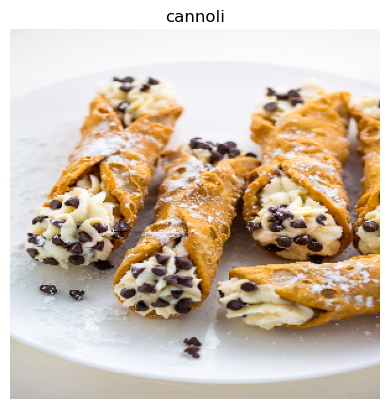

1/1 [==============================] - 0s 29ms/step


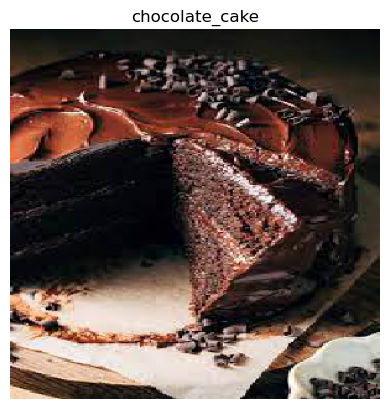

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

#creating a list of all the foods, in the argument i put the path to the folder that has all folders for food
def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
      for name in dirs:
        list_.append(name)
    return list_

#loading the model i trained and finetuned
my_model = load_model('model_trained.h5', compile = False)
food_list = create_foodlist("food-101/images")

#function to help in predicting classes of new images loaded from my computer(for now)
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    pred = model.predict(img)
    index = np.argmax(pred)    #Returns the indices of the maximum values along an axis, In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned.
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

#add the images you want to predict into a list (these are in the WD)
images = []
images.append('cannoli.jpg')
images.append('choco.jpeg')

print("PREDICTIONS BASED ON PICTURES UPLOADED")
predict_class(my_model, images, True)
